# Initial data investigation, cleaning and organization

* This notebook inspects the data from the 34th Street data export in a CSV file
  - in `data` folder called `articles_34st.csv`
  - This data was aquired through directly asking *The Daily Pennsylvanian* for the data from 2021-2024
  <br/><br/>
* Using the `pandas` module can inspect the fields and distribution of data


* Then export to a `list-of-dictionaries` structure and save as a JSON file
---

### Setup

In [6]:
import pandas as pd
import json
import matplotlib.pyplot as plt

### Read CSV file into `pandas` dataframe object

In [7]:
data_df = pd.read_csv('../data/articles_34st.csv', index_col=0)

### Inspect data

1. How many rows and how many columns?

In [8]:
data_df.shape

(2421, 11)

* 2421 rows (each row is an article)
* 11 columns
  - What are they?

In [4]:
# get column names
data_df.columns

Index(['id', 'type', 'srn', 'title', 'slug', 'content', 'published_date',
       'title_url', 'source', 'url', 'wordcount'],
      dtype='object')

* Look at first 5 rows in dataframe

In [5]:
data_df.head()

,id,type,srn,title,slug,content,published_date,title_url,source,url,wordcount
0,45769,article,f01dc5e8-ebc5-4c9c-aaf5-5c99e311fcfa,Penn Student Bands Make Good Grooves Easy to F...,crows-penn-records-good-company-msd-almost-veg...,A little fire is lit in the courtyard behind V...,2024-11-04 14:55:01,2024/11/crows-penn-records-good-company-msd-al...,34st,/article/2024/11/crows-penn-records-good-compa...,993
1,45663,article,748a55e0-5bd6-4b38-b172-1dfde995cc8f,Extended Day Without Extended Pay?,philadelphia-school-teachers-pay-underfunding-...,"There are 197,115 enrolled students in the Sch...",2024-11-04 14:50:44,2024/11/philadelphia-school-teachers-pay-under...,34st,/article/2024/11/philadelphia-school-teachers-...,1303
2,45636,article,c16a2638-f85e-496b-b592-f12693b4232f,A Conversation on ‘Megalopolis’,megalopolis-francis-ford-coppola-adam-driver-a...,"Jackson: Francis Ford Coppola, are you okay? ...",2024-11-04 14:49:01,2024/11/megalopolis-francis-ford-coppola-adam-...,34st,/article/2024/11/megalopolis-francis-ford-copp...,1740
3,45764,article,c5656fd7-efc1-435d-a078-84f1c499e313,A Conversation on Fear: Mackenzie Davis in SPE...,speak-no-evil-mackenzie-davis-interview,How does a horror film that doesn’t deliver it...,2024-11-01 14:42:00,2024/11/speak-no-evil-mackenzie-davis-interview,34st,/article/2024/11/speak-no-evil-mackenzie-davis...,969
4,45600,article,c0a12ffd-9d2e-4c88-b0ff-5fb219943c81,The Roots of Questlove Run Deep in Philadelphia,questlove-philadephia-community-philanthropy-r...,Sept. 21 is a very special day for fans of the...,2024-11-01 14:39:44,2024/11/questlove-philadephia-community-philan...,34st,/article/2024/11/questlove-philadephia-communi...,898


#### Observations

* Seems like magazine section is missing?
  - e.g. https://www.34st.com/section/ego gives list of articles in EGO section but these data not in export
  - Is this data available in another file (perhaps it is in another database table that wasn't exported?)
  <br/><br/>
* `url` can be used to get to article adding to https://www.34st.com

### Distribution of publication date

* The `published_date` field is a timestamp but is loaded as a string object
* Can convert to a `datetime` object that knows about dates and then add two new fields:
  1. `year`
  2. `month`


In [6]:
data_df['date_dt'] = pd.to_datetime(data_df['published_date'])
data_df=data_df.assign(year = data_df['date_dt'].dt.year,
               month = data_df['date_dt'].dt.month)

data_df[['published_date', 'year', 'month']].head()

,published_date,year,month
0,2024-11-04 14:55:01,2024,11
1,2024-11-04 14:50:44,2024,11
2,2024-11-04 14:49:01,2024,11
3,2024-11-01 14:42:00,2024,11
4,2024-11-01 14:39:44,2024,11


#### Distribution by year 
* Now create a distribution of the number of articles by year

In [7]:
year_dist = data_df['year'].value_counts().sort_index()
year_dist

2019      5
2020    598
2021    624
2022    496
2023    388
2024    310
Name: year, dtype: int64

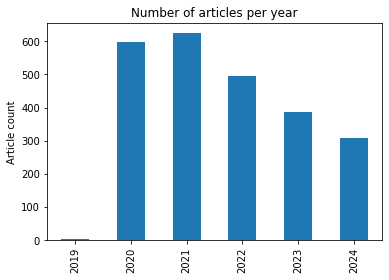

In [8]:
year_dist.plot(kind='bar')
plt.ylabel('Article count')
plt.title('Number of articles per year')
plt.show()

#### Observations

* Not much data for 2019 so probably exclude

#### Distribution by month

In [9]:
month_dist = data_df['month'].value_counts().sort_index()
month_dist

1     153
2     339
3     270
4     251
5     118
6     122
7      94
8      79
9     239
10    320
11    304
12    132
Name: month, dtype: int64

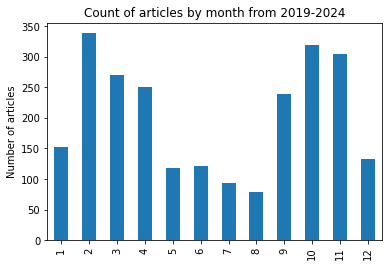

In [10]:
month_dist.plot(kind='bar')
plt.ylabel('Number of articles')
plt.title('Count of articles by month from 2019-2024')
plt.show()

#### Word count distribution

* There is a `wordcount` field with the data. Don't necessarily want to use that for all analyses as it may not align with how you decide to do tokenization.

* However, is useful to get a sense of the average length of articles and the overall size of the corpus

In [11]:
print(f"Total number of words: {data_df['wordcount'].sum()} words")
print(f"Average article length: {data_df['wordcount'].mean():.1f} words")

Total number of words: 2470195 words
Average article length: 1020.3 words


* Can also use the `describe()` function on a `dataframe` field to get descriptives

In [12]:
data_df['wordcount'].describe()

count    2421.000000
mean     1020.320116
std       543.908549
min         1.000000
25%       737.000000
50%       901.000000
75%      1153.000000
max      8635.000000
Name: wordcount, dtype: float64

#### Observations

* 2.5 million words in total (a good size for analysis and finding patterns)
* Average article is around 1000 words
* BUT what is going with a article wordcount of 1 (the `min`)?


In [13]:
# create a filter to find rows in data frame with wordcount == 1
articles_with_wc_of_1 = data_df['wordcount']==1
data_df[articles_with_wc_of_1].shape

(14, 14)

* There are 14 articles with a `wordcount` value of 1
* What is going on there?

In [14]:
data_df[articles_with_wc_of_1]

,id,type,srn,title,slug,content,published_date,title_url,source,url,wordcount,date_dt,year,month
916,42739,article,283d45b0-ea15-4927-b155-c9a1a7003980,Penn 10: Class of 2022,penn-10-class-of-2022-keeping-it-local,NaN,2022-05-13 23:58:14,2022/05/penn-10-class-of-2022-keeping-it-local,34st,/article/2022/05/penn-10-class-of-2022-keeping...,1,2022-05-13 23:58:14,2022,5
1007,42391,article,14abcd6b-754d-48ba-aca8-023f0c631267,Cheap Eats: Spring 2022 Dining Guide,spring-2022-dining-guide-cheap-eats-philly-res...,NaN,2022-03-29 12:00:00,2022/03/spring-2022-dining-guide-cheap-eats-ph...,34st,/article/2022/03/spring-2022-dining-guide-chea...,1,2022-03-29 12:00:00,2022,3
1116,41850,article,6494b4c2-e022-4304-b3e2-36fa9294d8b4,"Love, Actually: Street’s Love Issue 2022",love-issue-2022,NaN,2022-02-15 14:00:00,2022/02/love-issue-2022,34st,/article/2022/02/love-issue-2022,1,2022-02-15 14:00:00,2022,2
1186,41475,article,13050e56-9d82-45d6-8c61-63a370d61560,Dispatches from Isolation,isolation-penn-covid-sick-dorm-quarantine-test...,NaN,2022-01-18 19:00:19,2022/01/isolation-penn-covid-sick-dorm-quarant...,34st,/article/2022/01/isolation-penn-covid-sick-dor...,1,2022-01-18 19:00:19,2022,1
1205,41422,article,8ce2cda6-a24c-4208-a53c-a2ca7c1dc68d,"Penn, Interrupted",penn-interrupted-fall-2021,NaN,2021-12-07 20:05:40,2021/12/penn-interrupted-fall-2021,34st,/article/2021/12/penn-interrupted-fall-2021,1,2021-12-07 20:05:40,2021,12
1388,40810,article,1286c475-0eb9-462e-a142-80e5fc903337,Resetting the Table: Street's Fall 2021 Dining...,dining-guide-fall-2021,NaN,2021-09-28 18:46:57,2021/09/dining-guide-fall-2021,34st,/article/2021/09/dining-guide-fall-2021,1,2021-09-28 18:46:57,2021,9
1524,40230,article,1d943829-88f8-4702-9dc1-42a20a0847da,34th Street Presents: The Class of 2021's Penn 10,penn-10-spring-2021-pandemic-graduates,NaN,2021-05-13 17:55:02,2021/05/penn-10-spring-2021-pandemic-graduates,34st,/article/2021/05/penn-10-spring-2021-pandemic-...,1,2021-05-13 17:55:02,2021,5
1615,39930,article,8868a8ee-fc4a-4452-bc2d-fd5faf93ff10,Reality Bites: Street's Spring 2021 Dining Guide,dining-guide-spring-2021,NaN,2021-03-25 15:14:29,2021/03/dining-guide-spring-2021,34st,/article/2021/03/dining-guide-spring-2021,1,2021-03-25 15:14:29,2021,3
1698,39502,article,3d085b57-7f4a-4b29-9a36-79d0b7be13c6,Why Did Pennsylvania Flip Blue?,pennsylvania-2020-election-philadelphia-democr...,NaN,2021-02-25 05:00:00,2021/02/pennsylvania-2020-election-philadelphi...,34st,/article/2021/02/pennsylvania-2020-election-ph...,1,2021-02-25 05:00:00,2021,2
1712,39423,article,592cfdf0-dcf1-47d8-afad-2dc8dbfb739b,Bridging the Discipline Divide,pre-med-humanities-covid-19-pandemic-medicine-...,NaN,2021-02-19 16:45:16,2021/02/pre-med-humanities-covid-19-pandemic-m...,34st,/article/2021/02/pre-med-humanities-covid-19-p...,1,2021-02-19 16:45:16,2021,2


* Seem to be missing any `content`

* Check these urls:

In [15]:
data_df[articles_with_wc_of_1].apply(lambda r: f"https://www.34st.com{r['url']}", axis=1).to_list()

['https://www.34st.com/article/2022/05/penn-10-class-of-2022-keeping-it-local',
 'https://www.34st.com/article/2022/03/spring-2022-dining-guide-cheap-eats-philly-restaurant-reviews',
 'https://www.34st.com/article/2022/02/love-issue-2022',
 'https://www.34st.com/article/2022/01/isolation-penn-covid-sick-dorm-quarantine-test-positive-confusion-chaos',
 'https://www.34st.com/article/2021/12/penn-interrupted-fall-2021',
 'https://www.34st.com/article/2021/09/dining-guide-fall-2021',
 'https://www.34st.com/article/2021/05/penn-10-spring-2021-pandemic-graduates',
 'https://www.34st.com/article/2021/03/dining-guide-spring-2021',
 'https://www.34st.com/article/2021/02/pennsylvania-2020-election-philadelphia-democratic-republican',
 'https://www.34st.com/article/2021/02/pre-med-humanities-covid-19-pandemic-medicine-penn',
 'https://www.34st.com/article/2021/02/love-issue',
 'https://www.34st.com/article/2021/02/street-feature',
 'https://www.34st.com/article/2020/02/art-a-love-language-upenn-u

* Maybe not articles but links to issues?

* How does dropping these change the distribution?

In [16]:
data_df[-articles_with_wc_of_1]['wordcount'].describe()

count    2407.000000
mean     1026.248857
std       539.886059
min         9.000000
25%       739.000000
50%       902.000000
75%      1157.000000
max      8635.000000
Name: wordcount, dtype: float64

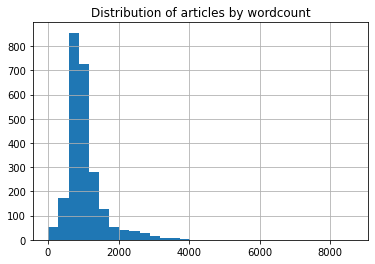

In [17]:
data_df[-articles_with_wc_of_1]['wordcount'].hist(bins=30)
plt.title('Distribution of articles by wordcount')
plt.show()

----

## Export data to a JSON file

1. Drop rows with no content
2. Convert data to a `list-of-dictionaries` data structure
3. Save to a JSON file
   - in `data` folder call file `articles_34st.json`

In [18]:
missing_content = data_df['content'].isna()
modified_df = data_df[-missing_content]
modified_df.shape

(2407, 14)

In [19]:
# Convert the DataFrame to a Dictionary
articles_dict = modified_df.drop(columns='date_dt').to_dict(orient='records')
len(articles_dict)

2407

* Inspect dictionary structure for first article

In [20]:
articles_dict[0]

{'id': 45769,
 'type': 'article',
 'srn': 'f01dc5e8-ebc5-4c9c-aaf5-5c99e311fcfa',
 'title': 'Penn Student Bands Make Good Grooves Easy to Find ',
 'slug': 'crows-penn-records-good-company-msd-almost-vegan-kapacity',
 'content': 'A little fire is lit in the courtyard behind Van Pelt.  On October 18th of this year, Penn Records, the hub of all things music–business at Penn, summoned four Penn–affiliated bands for their first show of the semester,  entertained by the Alpha Chi Rho, or "Crows", fraternity house. At ten p.m. sharp, the crowd shuffled in, the noise of scattered chatter interrupted by on–off attempts at karaoke Taylor Swift from the “stage”—a web of wires and amps seated stiffly on a lip of soil. Right now, the group is largely entourage, as groupies speak eagerly in small groups with scattered instrumentalists. They huddle under heat lamps, grab drinks, and await the first performance of the night.  The first ones on are Good Company—a peppy quartet including bassist Alex Ho

#### Filtering out before any articles published before 2020

In [24]:
filtered_articles = [entry for entry in articles_dict if entry.get("year", 0) >= 2020]

#### Write list of article dictionaries to a JSON file

In [26]:
with open('../data/articles_34st.json', 'w', encoding='utf-8') as out:
    out.write(json.dumps(filtered_articles, indent=4))